In [1]:
#Modification du dossier par défaut
import os
os.chdir('/Users/macbookair/Desktop/categorization/dataset')
#import file
import xlrd

In [2]:
# Analysis imports
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

In [3]:
dataset = pd.read_csv('datset2.csv',encoding='latin_1',sep = ',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_title  300 non-null    object
 1   keyword        300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [6]:
dataset.index

RangeIndex(start=0, stop=300, step=1)

In [5]:
dict_df = dataset.to_dict()
dict_df

{'article_title': {0: '17.5 An intrinsically linear wideband digital polar PA featuring AM-AM and AM-PM corrections through nonlinear sizing. overdrive-voltage control. and multiphase RF clocking.',
  1: '3D Inception U-Net for Aorta Segmentation using Computed Tomography Cardiac Angiography.',
  2: 'A 20.5TOPS and 217.3GOPS/mm<sup>2</sup> Multicore SoC with DNN Accelerator and Image Signal Processor Complying with ISO26262 for Automotive Applications.',
  3: 'A Birth-Death Process for Feature Allocation.',
  4: 'A Classroom Deployment of a Haptic System for Learning Cell Biology.',
  5: 'A Comprehensive Analysis on Adversarial Robustness of Spiking Neural Networks.',
  6: 'A Conceptual Framework for Integrating Inclusive Design into Design Education.',
  7: 'A Concurrent Skip List Balanced on Search.',
  8: 'A Data Forwarding Approach for Opportunistic Mobile Sensor Networks in Fire-Rescue Scenario.',
  9: 'A Deterministic Compressive Sensing Approach for Compressed Domain Image Analy

In [13]:
cles, vals = zip(*dict_df.items())


In [15]:
cles = list(dict_df.keys())
vals = list(dict_df.values())

In [14]:
cles

('article_title', 'keyword')

In [17]:
vals[1]

{0: 'intrinsically linear wideband digital polar pa featuring pm corrections nonlinear sizing voltage control multiphase rf clocking',
 1: '3d inception net segmentation using computed tomography cardiac angiography',
 2: 'mm sup multicore soc dnn accelerator image signal processor automotive applications',
 3: 'birth death process feature allocation',
 4: 'classroom deployment haptic system learning cell biology',
 5: 'comprehensive analysis adversarial robustness spiking neural networks',
 6: 'conceptual framework integrating inclusive design education',
 7: 'concurrent skip list balanced search',
 8: 'data forwarding approach opportunistic mobile sensor networks fire rescue scenario',
 9: 'deterministic compressive sensing approach compressed domain image analysis deterministic compressive sensing approach compressed domain image analysis',
 10: 'fast accurate edge detection algorithm real time deep space autonomous optical navigation',
 11: 'gis tool estimate flow basins using map 

In [18]:
cles0, vals0 = list(vals[0].keys()),list(vals[0].values())
cles1, vals1 = list(vals[1].keys()),list(vals[1].values())

In [24]:
titres, keywords = list(vals[1].keys()),list(vals[1].values())

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(keywords)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df['document'] = list(vals[0].keys())
df = df.set_index('document')

In [32]:
df

,13th,3d,6d,6th,absolute,abstract,abstraction,abstractive,abuse,ac,...,word,words,work,workers,workload,workshop,writing,yield,zero,zoom
document,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


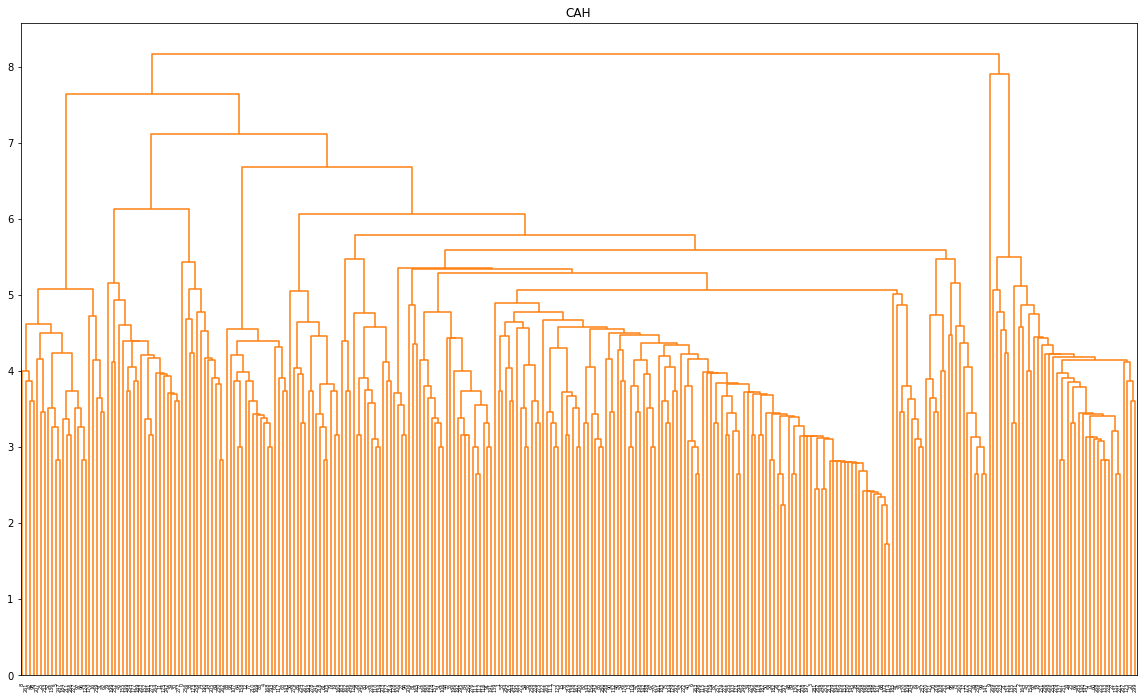

11 groupes constitués


In [54]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

#générer la matrice des liens 
#Z = linkage(df,method='single',metric='jaccard') 
Z = linkage(df,method='ward',metric='euclidean')

# génération et affichage du dendrogramme
plt.figure(figsize=(20,12))
plt.title("CAH") 

dendrogram(Z,labels=list(vals[0].keys()),color_threshold=100)

plt.show() 

groupes_cah = sch.fcluster(Z,t=5.5,criterion='distance') 
print(np.unique(groupes_cah).size, "groupes constitués")

In [55]:
print(groupes_cah)

[ 3  7 10  7  4  1  7  7  1 11  8  2  4  7  3  7  1  8 10  5 10  9 10 10
 10  1  7  7  6  2  2  1  6  7  7  7  7  7  3  2  7  7  1 10  7  2  7  7
  7  8  7  7  1  7  7  7  5  7  7  7 10  5  1  4  4  4 10  7  7  3  8 10
  7  8  3  7  7  4  7  5  6  7  7  4  7  7  5  7  4  7  7  7 10  4  7  8
  1  1  1  8  7  7  7  7  7  5  7  4  8  7  6  7  7  7  7  7  7  4  7  7
  7  8  7 10  1  7  6  6  7  7  7 10  7 10  6 10  1 10  7  7 10  8  7  4
  7  7  7 10  7  2  7  9  2  7 10  2  7  7  4  7  5  7  6  6 10  7  7  7
  4  4  1  7  8  3  7  2  7  2  7  7  7  2  7  7  1  7  7  7  7  2  3  7
  7  5  7  7  7  7  7  2  7  7  8  6  7  3  7  1  7  7  4  1  7  7  6  7
  8  7  5  7  8  7  7  9  7 10  6  1 10 10  3 10  8  1  5  7 10  7  7  1
  6  5  2  7  7  9  6  1  7  7  7 10  2  7  2 10  3  7  3  8  8  1  3  7
  2  7  1  5 10  9  7 10  7  2  7  7  7  2  5  5  7  7  7  2  7 10  7 10
  7 10  7 10  7  4  7  7  7  7  7 10]


In [59]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

In [60]:
#affichage des observations et leurs groupes
groupes = pd.DataFrame(df.index[idg],groupes_cah[idg])
groupes['groupe'] = groupes.index

In [61]:
groupes.head(60)

,document,groupe
1,25,1
1,96,1
1,97,1
1,98,1
1,124,1
1,42,1
1,136,1
1,170,1
1,184,1
1,31,1


In [62]:
groupes['groupe'].value_counts()

7     143
10     34
1      23
2      20
8      17
4      17
6      14
5      14
3      12
9       5
11      1
Name: groupe, dtype: int64